# Here Business Problem is K-Means

## Domain Analysis

In [210]:
import numpy as np # use for numerical function
import pandas as pd # use for data cleaning and data analysis
import matplotlib.pyplot as plt # use for data visualixation
import seaborn as sns # use for data visualization

In [211]:
# load the data 
data = pd.read_csv("penguins.csv")
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


## Atrribute Information:-
**culmen_length_mm:-** 
The culmen is the ridge along the top of a bird's beak.
**culmen_depth_mm:-**
This measures the vertical thickness (depth) of the bird's beak at its base.
**flipper_length_mm :-**
This column is show the bird wings length to the shoulder.
**body_mass_g:-**
This column is show the Total bird wights.
**Sex :-**
This column is show the bird gender.

## Basic check:-

In [212]:
data.head() # shownig the top 5 rows 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [213]:
data.tail() # showning to last 5 rows

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE


In [214]:
data.describe() # use for continous Data information

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


* Here flipper_length_mm minimum is -132 is not possible.

In [215]:
data.describe(include="O") # use for categorical data information

,sex
count,335
unique,3
top,MALE
freq,169


* Here Male bird is high in dataset.

In [216]:
data.info() # use for data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


* Here we can see the null value in columns.

## EDA:- Exploratory Data Analysis

In [217]:
# store the column name
for column in data:
    print(column)

culmen_length_mm
culmen_depth_mm
flipper_length_mm
body_mass_g
sex


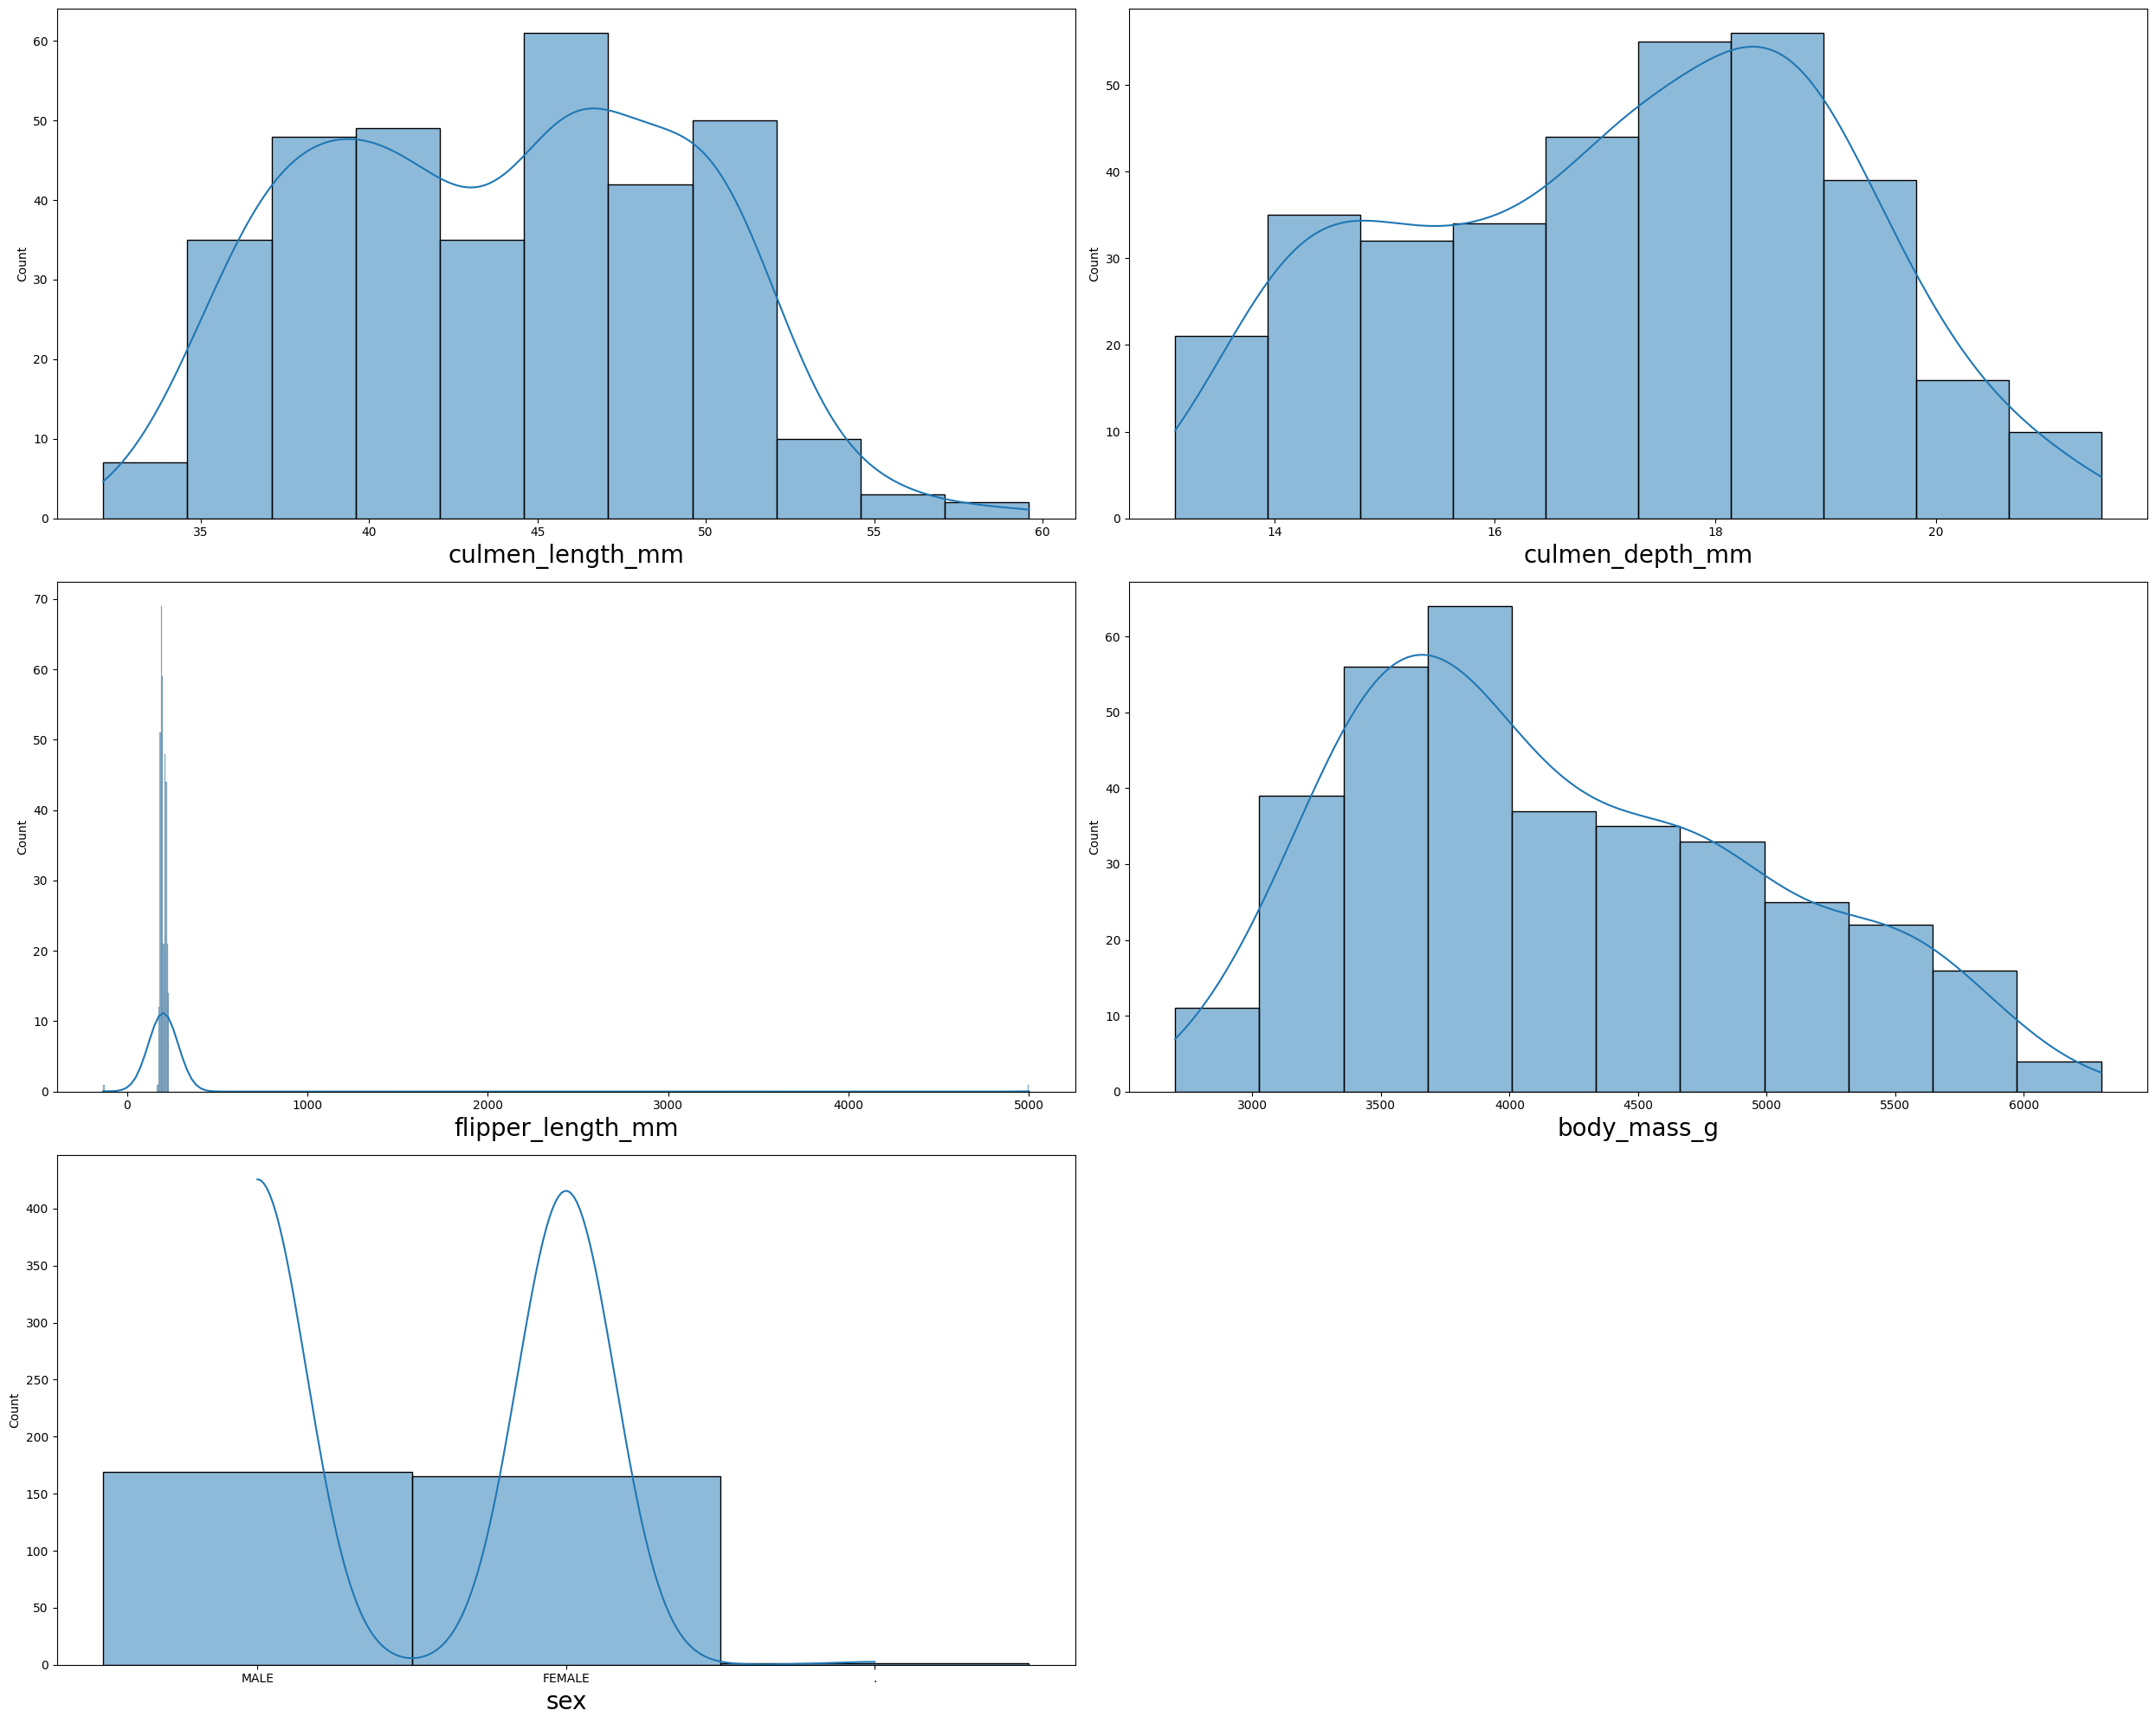

In [218]:
# Univerant Analysis
plt.figure(figsize=(25,20)) # define plot size
plt_num = 1
for column in data:
    if plt_num <= 5:
        plt.subplot(3,2,plt_num)
        sns.histplot(data[column],kde=True) # create a histogram plot
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

<Axes: xlabel='flipper_length_mm'>

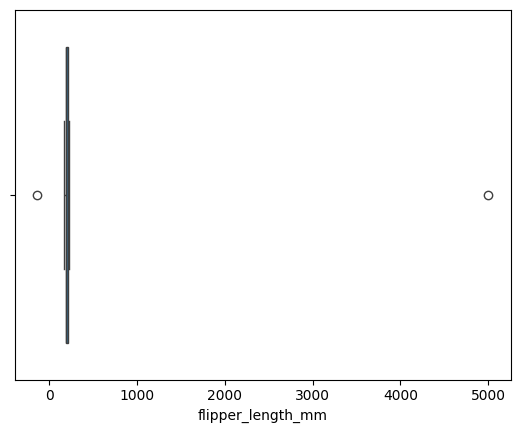

In [219]:
sns.boxplot(x = data.flipper_length_mm) # check the outliers

In [220]:
data.flipper_length_mm.median() # check the median

197.0

In [221]:
data.loc[data["flipper_length_mm"] >= 4000,"flipper_length_mm"] = 197.0 # handle the outliers

<Axes: xlabel='flipper_length_mm'>

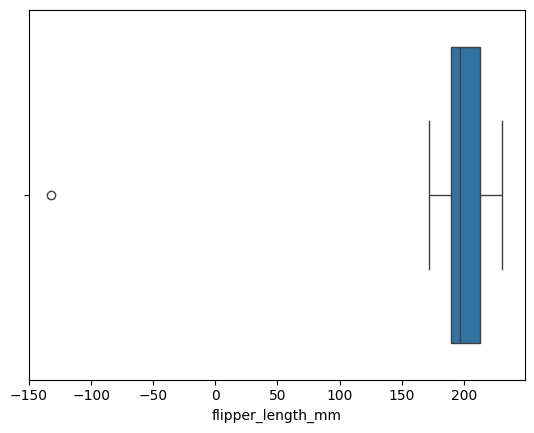

In [222]:
sns.boxplot(x = data.flipper_length_mm) # check the outliers

In [223]:
data.loc[data["flipper_length_mm"] <= 0,"flipper_length_mm"] = 197.0 # handle the outliers

<Axes: xlabel='flipper_length_mm'>

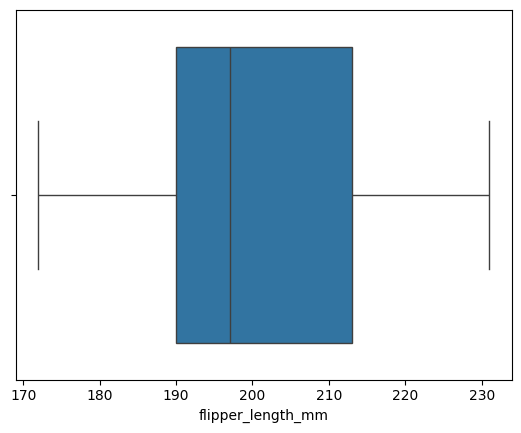

In [224]:
sns.boxplot(x = data.flipper_length_mm) # check the outliers

* Here we can not see the any Normal Distribution in any column.

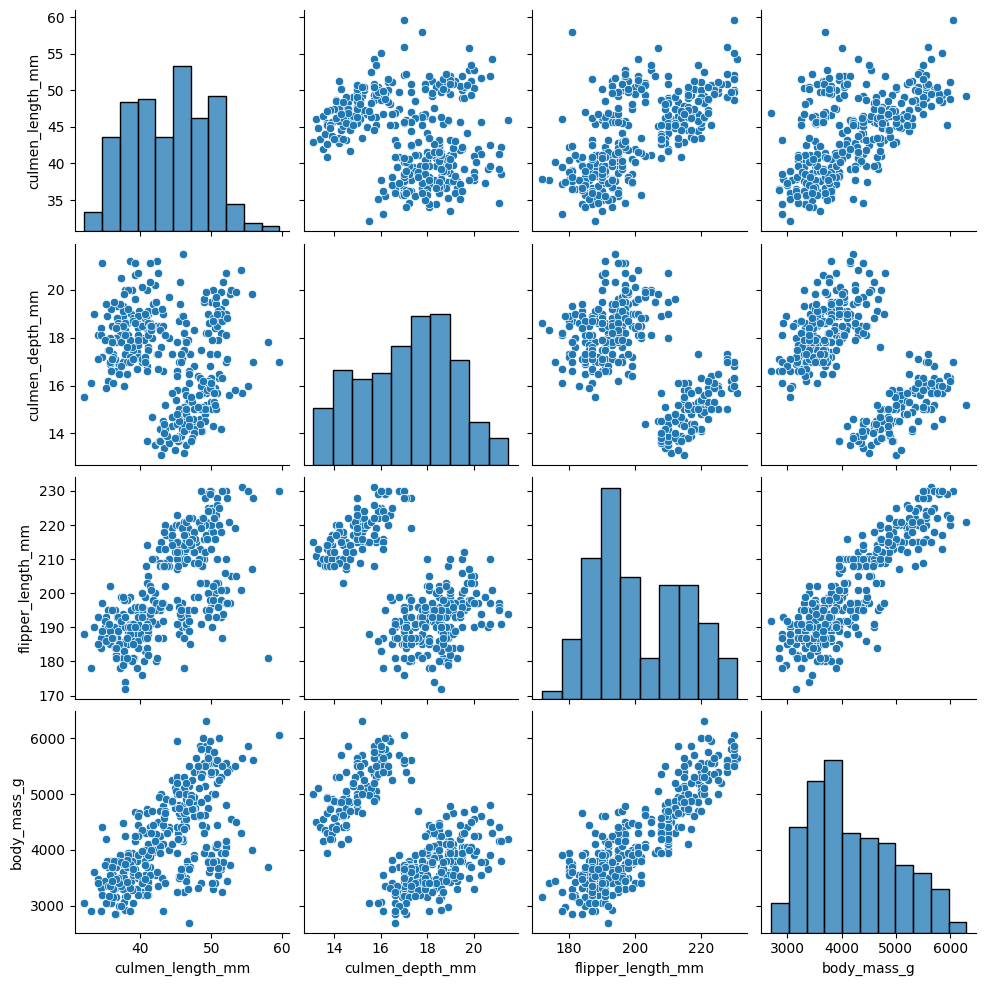

In [225]:
sns.pairplot(data) # Multiveriant Analysis

* Here no Insights.

## Data Preprocessing

In [226]:
data.isnull().sum() # check the null anaysis

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [227]:
data.culmen_length_mm.median() # check the median

44.45

In [228]:
data.culmen_depth_mm.median()  # check the median

17.3

In [229]:
data.flipper_length_mm.median()  # check the median

197.0

In [230]:
data.body_mass_g.median()  # check the median

4050.0

In [231]:
data.sex.value_counts()  # check the sex value count

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [232]:
data.sex.mode() #check the mode

0    MALE
Name: sex, dtype: object

In [233]:
data.loc[data["culmen_length_mm"].isnull(),"culmen_length_mm"] = 17.3 # handle the null value 

In [234]:
data.loc[data["culmen_depth_mm"].isnull(),"culmen_depth_mm"] = 17.3 # handle the null value

In [235]:
data.loc[data["flipper_length_mm"].isnull(),"flipper_length_mm"] = 197.0 # handle the null value

In [236]:
data.loc[data["body_mass_g"].isnull(),"body_mass_g"] = 4050.0 # handle the null value

In [237]:
data.loc[data["sex"].isnull(),"sex"] = "MALE" # handle the null value

In [238]:
data.isnull().sum() # check the null value

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

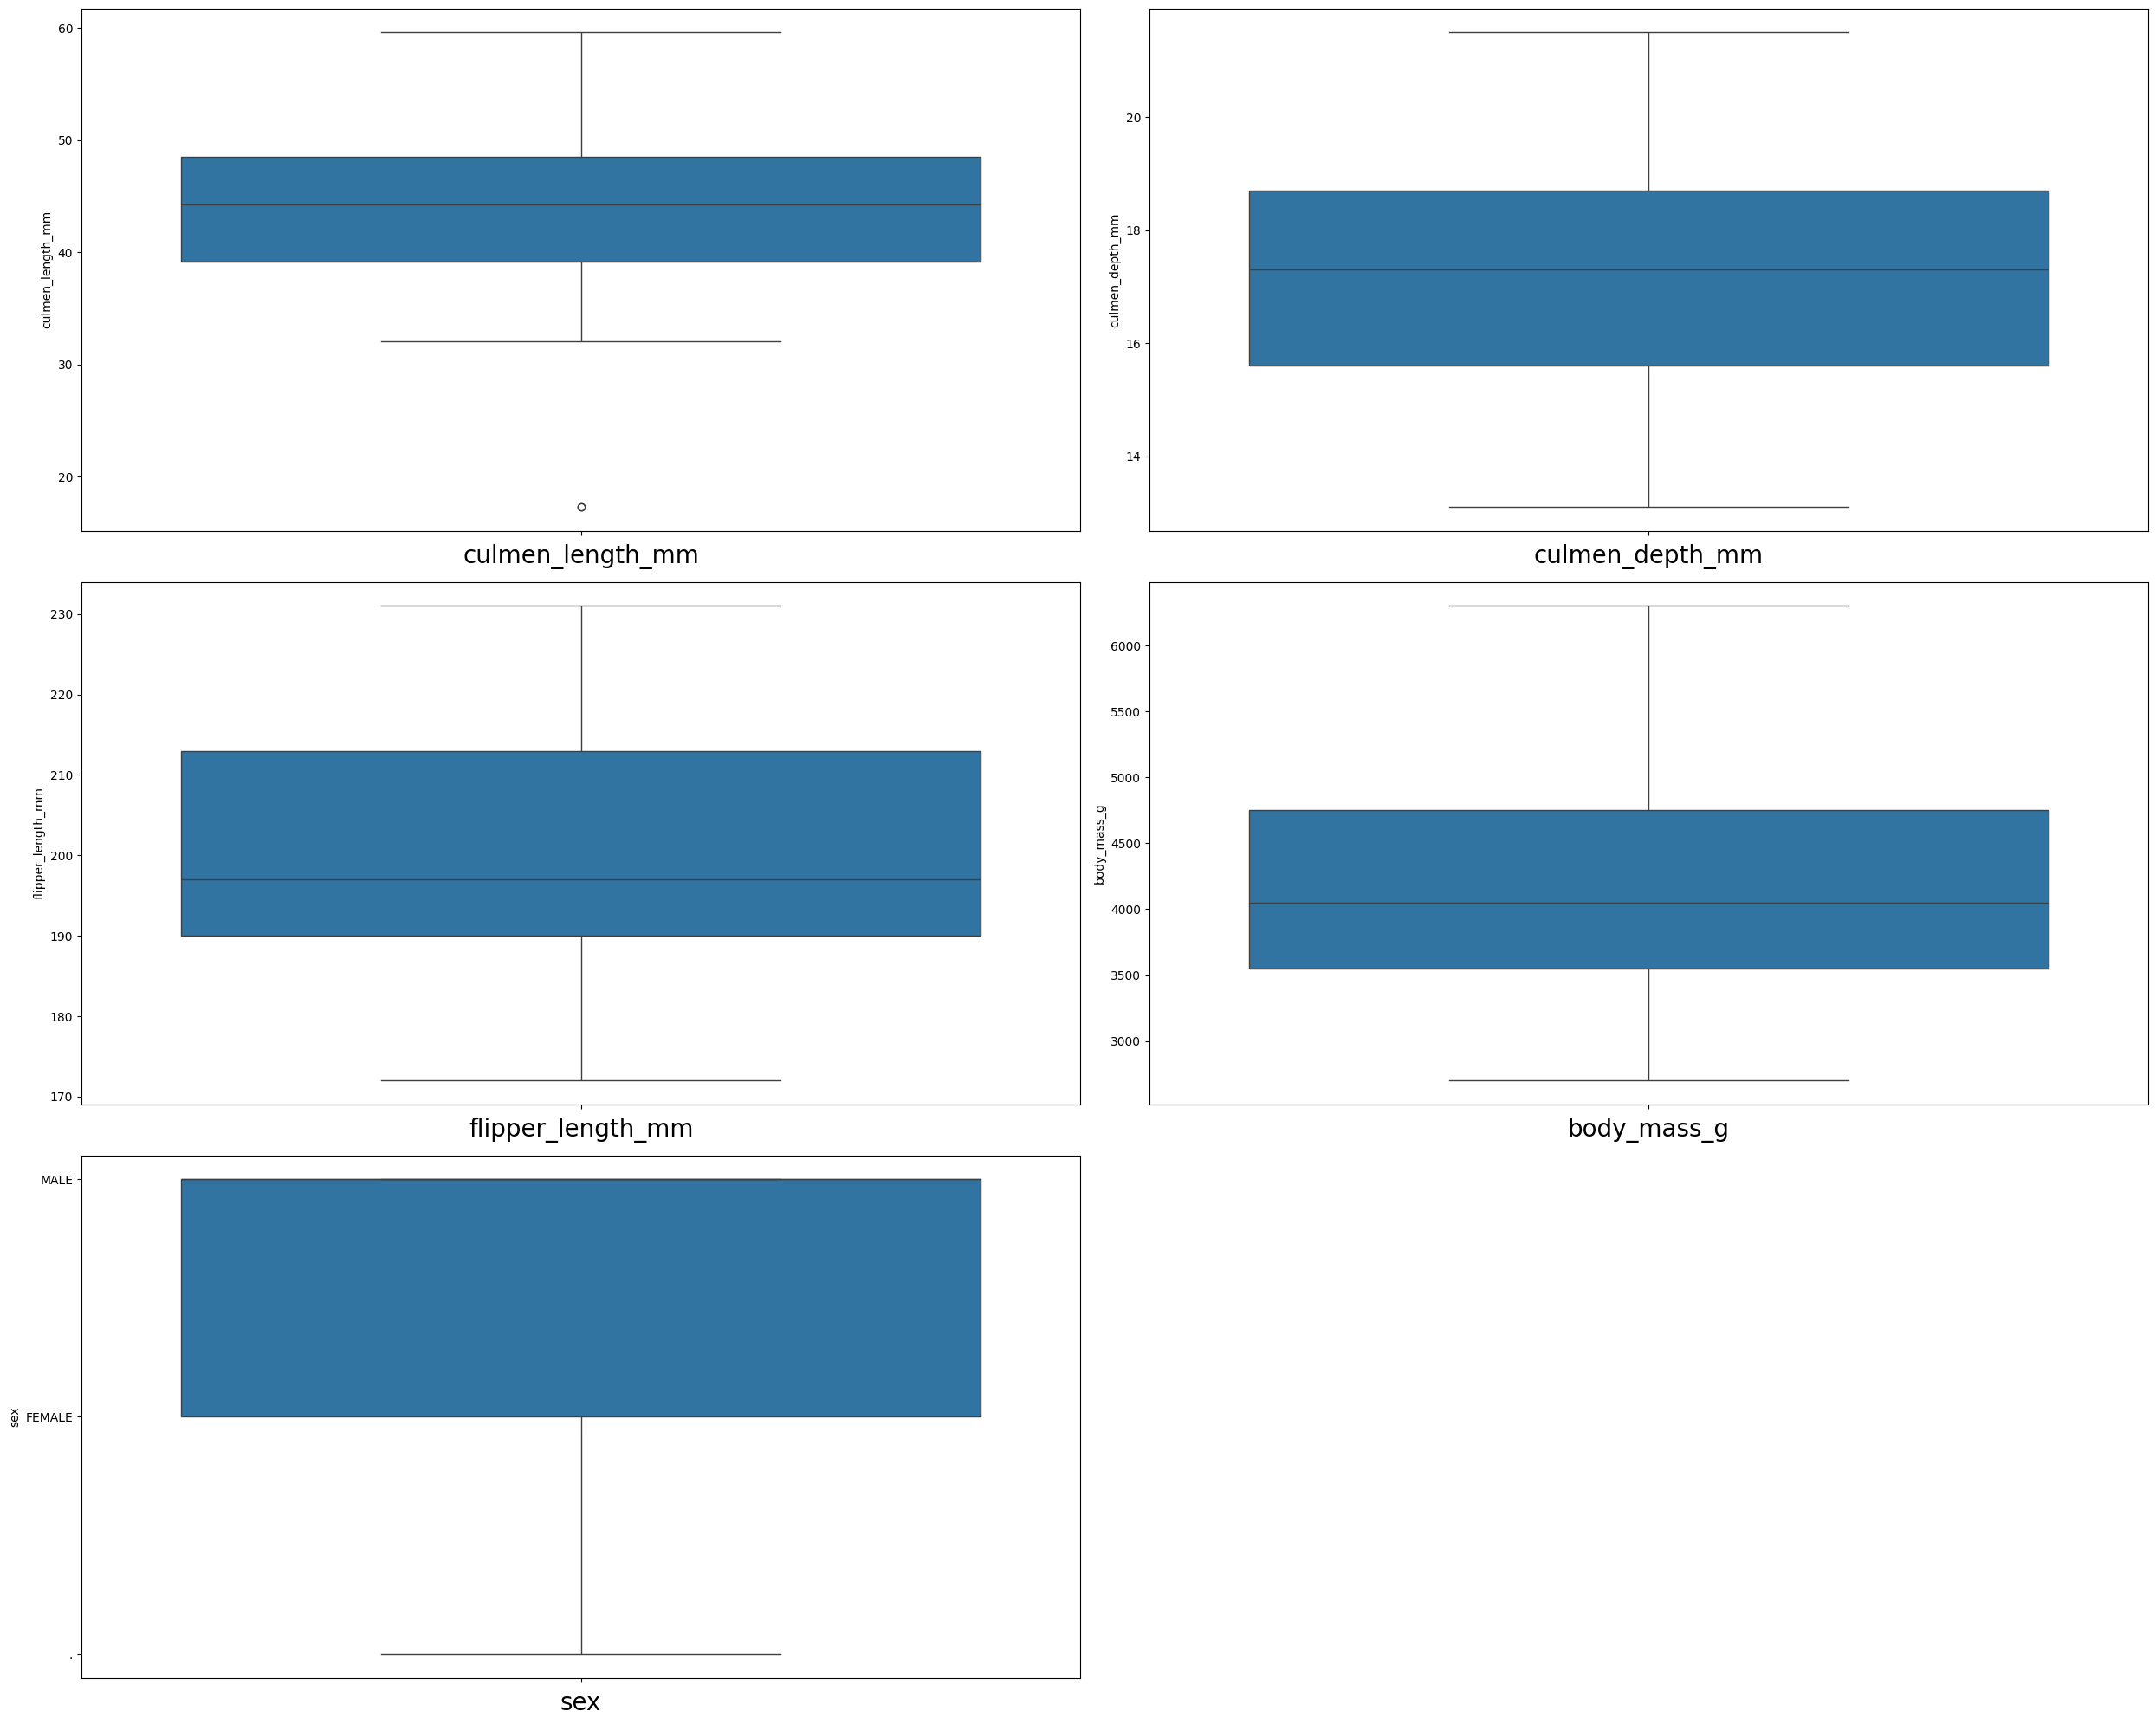

In [239]:
plt.figure(figsize=(25,20)) # define the plot size
plt_num = 1
for column in data:
    if plt_num <= 5:
        plt.subplot(3,2,plt_num)
        sns.boxplot(data[column]) # create the boxplot
        plt.xlabel(column,fontsize = 20)
    plt_num += 1
plt.tight_layout()

In [240]:
data.head() # showning the top 5 rows

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,17.3,17.3,197.0,4050.0,MALE
4,36.7,19.3,193.0,3450.0,FEMALE


In [241]:
data.sex.unique() # check the unique value

array(['MALE', 'FEMALE', '.'], dtype=object)

In [242]:
data.loc[data["sex"] == ".","sex"] = "MALE" # handle the unknown value

In [243]:
from sklearn.preprocessing import OneHotEncoder # import the label encoding
LE = OneHotEncoder() # call the encoding
df = pd.get_dummies(data["sex"],dtype="int",prefix="sex") # transform the data

In [244]:
df

,sex_FEMALE,sex_MALE
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
339,0,1
340,1,0
341,0,1
342,1,0


In [245]:
data1 = pd.concat([data,df],axis=1) # concate the data

In [246]:
data1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,MALE,0,1
1,39.5,17.4,186.0,3800.0,FEMALE,1,0
2,40.3,18.0,195.0,3250.0,FEMALE,1,0
3,17.3,17.3,197.0,4050.0,MALE,0,1
4,36.7,19.3,193.0,3450.0,FEMALE,1,0
...,...,...,...,...,...,...,...
339,17.3,17.3,197.0,4050.0,MALE,0,1
340,46.8,14.3,215.0,4850.0,FEMALE,1,0
341,50.4,15.7,222.0,5750.0,MALE,0,1
342,45.2,14.8,212.0,5200.0,FEMALE,1,0


In [247]:
data2 = data1.drop("sex",axis=1) # drop the column

In [248]:
data2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,17.3,17.3,197.0,4050.0,0,1
4,36.7,19.3,193.0,3450.0,1,0
...,...,...,...,...,...,...
339,17.3,17.3,197.0,4050.0,0,1
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


In [249]:
data2.info() # dataset information show

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   344 non-null    float64
 1   culmen_depth_mm    344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
 4   sex_FEMALE         344 non-null    int32  
 5   sex_MALE           344 non-null    int32  
dtypes: float64(4), int32(2)
memory usage: 13.6 KB


In [250]:
data2.head() # shownig the top 5 rows

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,17.3,17.3,197.0,4050.0,0,1
4,36.7,19.3,193.0,3450.0,1,0


In [251]:
data2.columns # show the columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

## Feature Engineering

<Axes: >

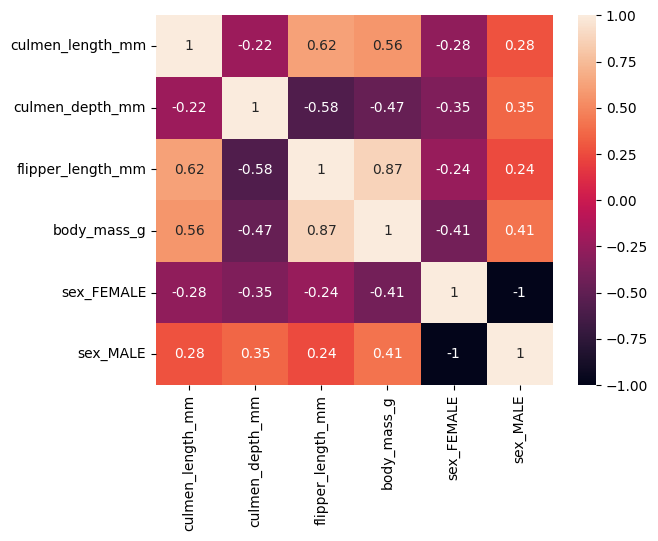

In [252]:
sns.heatmap(data2.corr(),annot=True) # use for check the corelationship

## Model Selection

In [253]:
x = data2 # independent variable

In [254]:
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,17.3,17.3,197.0,4050.0,0,1
4,36.7,19.3,193.0,3450.0,1,0
...,...,...,...,...,...,...
339,17.3,17.3,197.0,4050.0,0,1
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


In [255]:
from sklearn.preprocessing import MinMaxScaler # import the scalling
ME = MinMaxScaler() # call the scalling
df = ME.fit_transform(x) # tranform the data

In [256]:
x.columns # show the column name

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [258]:
# tranform store in the 
x1 = pd.DataFrame(data=df,columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g','sex_FEMALE', 'sex_MALE'])

In [259]:
x1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,0.515366,0.666667,0.152542,0.291667,0.0,1.0
1,0.524823,0.511905,0.237288,0.305556,1.0,0.0
2,0.543735,0.583333,0.389831,0.152778,1.0,0.0
3,0.000000,0.500000,0.423729,0.375000,0.0,1.0
4,0.458629,0.738095,0.355932,0.208333,1.0,0.0
...,...,...,...,...,...,...
339,0.000000,0.500000,0.423729,0.375000,0.0,1.0
340,0.697400,0.142857,0.728814,0.597222,1.0,0.0
341,0.782506,0.309524,0.847458,0.847222,0.0,1.0
342,0.659574,0.202381,0.677966,0.694444,1.0,0.0


In [260]:
from sklearn.decomposition import PCA # import the pca

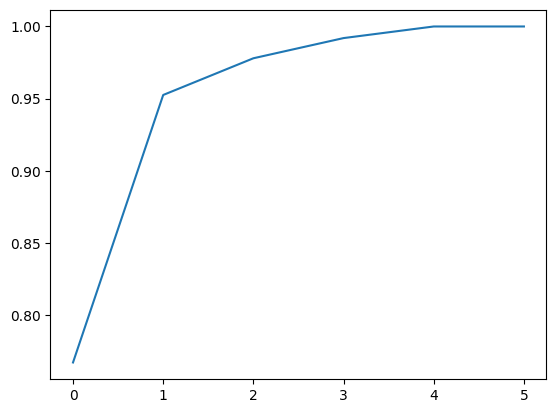

In [261]:
pca = PCA() # call the pca model
df = pca.fit_transform(x1) # tranform the data into pca
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # show the graph based on pca
plt.show()

In [292]:
np.where(np.cumsum(pca.explained_variance_ratio_)<=99) # check the pca value performance

(array([0, 1, 2, 3, 4, 5], dtype=int64),)

In [293]:
pca = PCA(n_components=6) # define the n_components
new_data = pca.fit_transform(x1) # transform the data
column_name = [f"Principle Components {i}" for i in range(0,6)] column name define
principle_data = pd.DataFrame(data = new_data,columns=column_name) # create a dataframe

In [294]:
principle_data

,Principle Components 0,Principle Components 1,Principle Components 2,Principle Components 3,Principle Components 4,Principle Components 5
0,0.627693,-0.453941,-0.162614,0.020932,-0.094249,-9.992007e-16
1,-0.761834,-0.188082,-0.006564,-0.053599,-0.100768,-8.881784e-16
2,-0.759639,-0.209414,0.078510,-0.009553,0.105223,8.881784e-16
3,0.616255,-0.263627,-0.481092,-0.382069,0.177189,2.331468e-15
4,-0.743414,-0.304606,0.142105,-0.155883,0.079761,7.771561e-16
...,...,...,...,...,...,...
339,0.616255,-0.263627,-0.481092,-0.382069,0.177189,2.331468e-15
340,-0.704849,0.504168,0.015573,-0.009491,-0.012716,0.000000e+00
341,0.747285,0.513676,0.024796,-0.037137,-0.057050,-4.440892e-16
342,-0.692005,0.482774,0.037653,-0.103590,-0.096661,-6.661338e-16


In [44]:
y

0      2
1      1
2      1
3      2
4      1
      ..
339    2
340    1
341    2
342    1
343    2
Name: sex, Length: 344, dtype: int32

In [262]:
from sklearn.cluster import KMeans import the kmeans

In [263]:
model = KMeans(n_clusters=3) # call the kmeans

In [295]:
model.fit(principle_data) # train the model

KMeans(n_clusters=3)

In [296]:
model.labels_ # check the labels

array([2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [297]:
model.cluster_centers_ # check the datapoints cluster mean

array([[-7.50173396e-01,  1.56890397e-02,  4.24735422e-03,
        -1.19553958e-03, -2.53397205e-04,  2.42230478e-17],
       [ 7.31353915e-01,  4.56575738e-01, -1.36411378e-02,
        -6.59411730e-03, -2.42574612e-03, -2.22044605e-17],
       [ 6.68777244e-01, -2.83036092e-01,  1.63035535e-03,
         5.49018995e-03,  1.74985997e-03, -1.38290938e-16]])

In [298]:
model1 = np.array(["red","green","yellow"]) # store cluster color

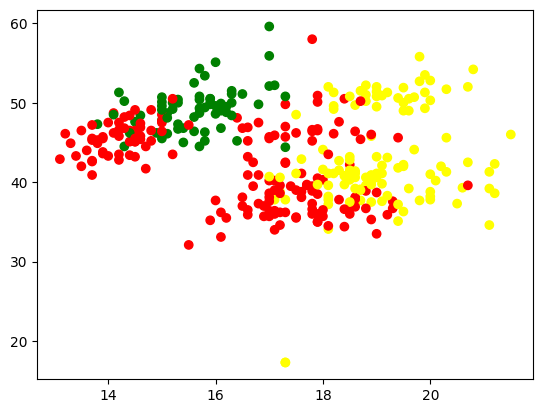

In [343]:
plt.scatter(data.culmen_depth_mm,data.culmen_length_mm,color = model1[model.labels_]) # show the plot

In [301]:
# Elbow Technique
wcss = []
for i in range(1,11):
    model3 = KMeans(n_clusters=i,random_state=42)
    model3.fit(principle_data)
    model3.inertia_ # show average of datapoint to centroid
    wcss.append(model3.inertia_)

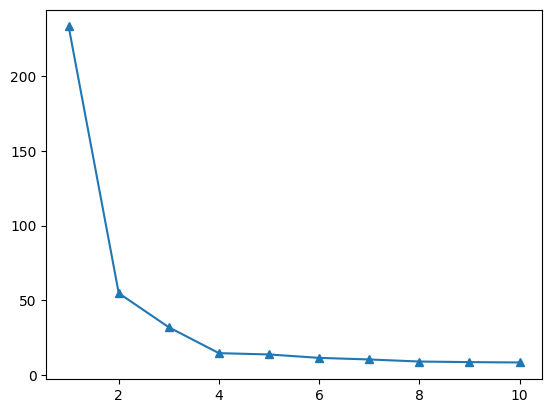

In [302]:
plt.plot(range(1,11),wcss,marker="^") # show the plot
plt.show()

In [345]:
KMM = KMeans(n_clusters=4) # call Kmeans
KMM.fit(x1)

KMeans(n_clusters=4)

In [346]:
KMM.labels_ # check the labels

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3,

In [347]:
KMM.cluster_centers_  # check the datapoints cluster mean

array([[ 5.41790946e-01,  5.37049399e-01,  2.88927610e-01,
         1.99766355e-01,  1.00000000e+00, -7.77156117e-16],
       [ 6.09120319e-01,  7.09795322e-01,  3.81058579e-01,
         3.58430799e-01,  8.32667268e-16,  1.00000000e+00],
       [ 7.55010002e-01,  3.03113553e-01,  8.33637549e-01,
         7.58226496e-01, -5.55111512e-17,  1.00000000e+00],
       [ 6.68174778e-01,  1.35467980e-01,  6.89947399e-01,
         5.49928161e-01,  1.00000000e+00,  1.11022302e-16]])

In [348]:
KMM.inertia_ # check the average

14.62400317011904

In [349]:
labels = KMM.labels_ # store the lables
labels

from sklearn.metrics import silhouette_score # check the qualty of cluster
score = silhouette_score(x1,labels)
score

0.6436212305891181

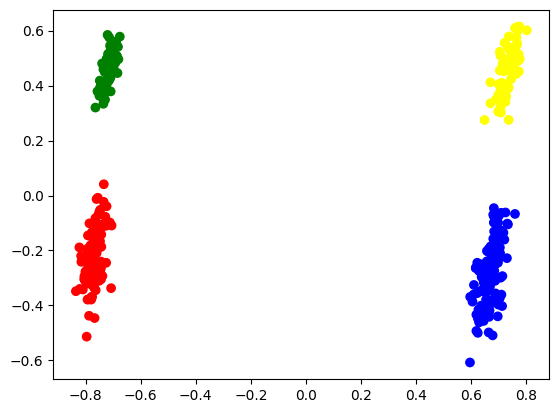

In [370]:
abc = np.array(["red","blue","yellow","green","black"]) # store the color
# show the plot
plt.scatter(x = principle_data["Principle Components 0"],y = principle_data["Principle Components 1"],color = abc[KMM.labels_])

## Final Conclusion

* Here we can see the total 4 cluster create in kmeans and Perfactly show the cluster in plot
and silhouette_score is 0.64 show.

## Save the model

In [371]:
import pickle # import pickle
with open("Penguis.pkl","wb") as f: # save the file
    pickle.dump(KMM,f) # model dump

In [372]:
with open("Penguis.pkl","rb") as f: # load the file
    file = pickle.load(f)

In [373]:
file

KMeans(n_clusters=4)

In [378]:
data2.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,17.3,17.3,197.0,4050.0,0,1
4,36.7,19.3,193.0,3450.0,1,0


In [380]:
file.predict([[17.3	,17.3,	197.0,	4050.0,	0,	1]]) # predict the value

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

                                                            ! Thank You !